# 字"姐"跳动，Character dancing！
<div style="text-align: center;">
  <img  width=70%, src='https://ai-studio-static-online.cdn.bcebos.com/be244da60529497abab5be632f3a70b795e6b4b2a4ae4d0d8b5950a58d17b662'/>
</div>

##  一、项目背景
	  我们身处一个数字时代，代码、网络、算法纵横交错，它们铺天盖地，却又隐匿无形。 如果它们都能被看见，通过色彩来描绘，那会是一种怎样的美妙景象？。
<div style="text-align: center;">
  <img width=70%, src='https://ai-studio-static-online.cdn.bcebos.com/0845bc745b774beabf9493643170995fa89365bb7cbb4f538423360dd526ded4'/>
</div>

<br/>

	艺术家门将科技融入艺术，发布令人震撼的各类数字艺术展览。  那么我们是否也可以运用学习到的AI知识，来简单实现一个类似的项目呢？


## 二、效果展示

   通过 PaddleSeg 完成人像分割，将人像进行分割，将得到的人像作为词云的填充区域进行填充，然后将填充好的人像添加背景，最后完成我们想要的效果。 下面我们一起来看一下整体效果吧:
- 对单张图片的转换，左边是原始图片，通过人像分割，再将人像作为词云的填充区域进行填充，右边就是我们实现的效果：
<div style="text-align: center;">
  <img  src='https://ai-studio-static-online.cdn.bcebos.com/77f2b87fe9a74fdf912be4146c3aca8c40b8bda27b624ceb9c9b57a273c472d7'/>
  
</div>


- 在实现单张图片转换之后，我们就可以对视频中的每一帧进行处理，通过视频中的人物运动，让字"姐"动起来!  我b站上找了一个性感的小姐姐进行转换（别只看小姐姐哦！），效果如下：

<div style="text-align: center;">
  <img src='https://ai-studio-static-online.cdn.bcebos.com/24b85d2f301d48978ac5139226e3d492c3cdf4092c2e4f1996cd5f2735d4967a'/>
	<img src='https://ai-studio-static-online.cdn.bcebos.com/fea32cd55d034a45bb4e1dd15cf8d59e57d59a54b03b48bfaa2f2ca47b9d137a'/>
</div>


- 观看完整视频请搓下方播放按钮，**高清视频请到源站播放**

<iframe style="width:100%;height: 640px;" src="//player.bilibili.com/player.html?aid=245113253&bvid=BV1yv41167a9&cid=248120484&page=1"   webkitallowfullscreen="true" mozallowfullscreen="true" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>



	NOTE： 如果您在本地运行该项目示例，需要首先安装PaddleSeg。如果您在线运行，需要首先fork该项目示例。之后按照该示例操作即可。   
    附：PaddleSeg 课程链接：https://aistudio.baidu.com/aistudio/course/introduce/1767
    
- 如果你觉得这个项目还挺有意思，欢迎大家 ***Fork / ❤喜欢 / 评论*** 三连，你的**支持**是这个项目更新的最大动力！希望后续还能给大家输出更有意思的项目！

## 三、实现步骤
### 1. 安装依赖库
- PaddleSeg 图像分割库 [官方地址](https://github.com/PaddlePaddle/PaddleSeg.git)


In [ ]:
# GPU设置
%set_env CUDA_VISIBLE_DEVICES=0

! pip install wordcloud

env: CUDA_VISIBLE_DEVICES=0
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 368kB 9.1MB/s eta 0:00:01


项目中已经下载PaddleSeg，若你想在自己的电脑环境中安装PaddleSeg，可运行如下命令：

```
# 从PaddleSeg的github仓库下载代码
git clone https://github.com/PaddlePaddle/PaddleSeg.git

# 运行PaddleSeg的程序需在PaddleSeg目录下
cd PaddleSeg/

# 安装所需依赖项
pip install -r requirements.txt
```

In [ ]:
# 解压从PaddleSeg Github仓库下载好的压缩包
!unzip -o PaddleSeg.zip
# 运行脚本需在PaddleSeg目录下
%cd PaddleSeg
# 安装所需依赖项
!pip install -r requirements.txt

Archive:  PaddleSeg.zip
   creating: PaddleSeg/
   creating: PaddleSeg/pretrained_model/
  inflating: PaddleSeg/pretrained_model/download_model.py  
  inflating: PaddleSeg/.copyright.hook  
   creating: PaddleSeg/tutorial/
  inflating: PaddleSeg/tutorial/finetune_icnet.md  
   creating: PaddleSeg/tutorial/imgs/
  inflating: PaddleSeg/tutorial/imgs/optic_icnet.png  
  inflating: PaddleSeg/tutorial/imgs/optic_deeplab.png  
  inflating: PaddleSeg/tutorial/imgs/optic_unet.png  
  inflating: PaddleSeg/tutorial/imgs/optic.png  
  inflating: PaddleSeg/tutorial/imgs/optic_pspnet.png  
  inflating: PaddleSeg/tutorial/imgs/optic_hrnet.png  
  inflating: PaddleSeg/tutorial/finetune_hrnet.md  
  inflating: PaddleSeg/tutorial/finetune_unet.md  
  inflating: PaddleSeg/tutorial/finetune_pspnet.md  
  inflating: PaddleSeg/tutorial/finetune_fast_scnn.md  
  inflating: PaddleSeg/tutorial/finetune_deeplabv3plus.md  
  inflating: PaddleSeg/tutorial/finetune_ocrnet.md  
  inflating: PaddleSeg/LICENSE      

In [ ]:
# 将配置文件humanseg.yaml复制到configs目录下
!cp /home/aistudio/work/humanseg.yaml /home/aistudio/PaddleSeg/configs/

# 下载预训练模型并放入./pretrained_model目录下
%cd /home/aistudio/PaddleSeg/pretrained_model/ 
!wget https://paddleseg.bj.bcebos.com/models/deeplabv3p_xception65_humanseg.tgz 
!tar -xf deeplabv3p_xception65_humanseg.tgz  
%cd /home/aistudio

/home/aistudio/PaddleSeg/pretrained_model
--2020-10-31 19:06:51--  https://paddleseg.bj.bcebos.com/models/deeplabv3p_xception65_humanseg.tgz
Resolving paddleseg.bj.bcebos.com (paddleseg.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c00:6c21:10ad:0:ff:b00e:67d
Connecting to paddleseg.bj.bcebos.com (paddleseg.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307082137 (293M) [application/x-gzip]
Saving to: ‘deeplabv3p_xception65_humanseg.tgz’

deeplabv3p_xception 100%[===================>] 292.86M  44.7MB/s    in 7.1s    

2020-10-31 19:06:58 (41.0 MB/s) - ‘deeplabv3p_xception65_humanseg.tgz’ saved [307082137/307082137]

/home/aistudio


### 2. 目录和资源
- 所有资源在work目录下
    - work/imgs 目录下是从网上找的图片资源
    - work/output_pose 是人像分割后的图片目录
    - work/videos 是视频存放目录
    - work/texts 是填充文本和字体存放目录
    - work/mp4_img 是视频导出的图片
    - work/mp4_img_mask 图片mask结果
    - work/mp4_img_analysis 视频图片分析结果

In [ ]:
! mkdir work/videos
! mkdir work/texts
! mkdir work/mp4_img
! mkdir work/mp4_img_mask
! mkdir work/mp4_img_analysis

# 解压视频素材
!cp /home/aistudio/data/data57852/001.mp4 -d /home/aistudio/work/videos/001.mp4

# 解压文本素材
!unzip -q -o /home/aistudio/data/data57853/texts.zip -d /home/aistudio/work/

### 3. 查看单张图片的人像提取效果

In [ ]:
# import paddlehub as hub
import cv2
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from matplotlib import colors
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
def img_show_bgr(image, size=10, convert=True):
    '''
        cv读取的图片显示
    '''
    if convert:
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(size,size))
    plt.imshow(image)
    
    plt.axis("off")
    plt.show() 

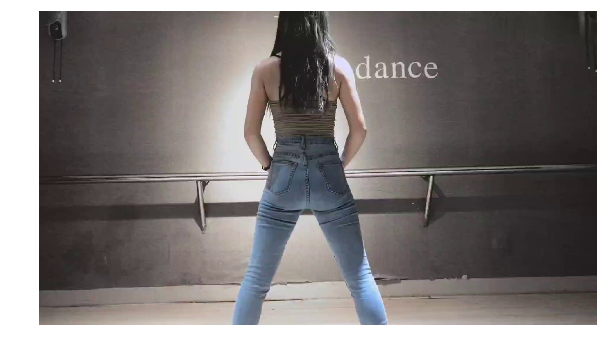

In [ ]:
body_img = cv2.imread('work/imgs/body.jpg')
img_show_bgr(body_img)

In [ ]:
# 模型预测
# Note: 若你没有gpu计算资源，只需要在以下脚本中删除参数`--use_gpu`重新运行即可。

!python /home/aistudio/PaddleSeg/pdseg/vis.py  \
                        --cfg /home/aistudio/work/humanseg_test.yaml \
                        --vis_dir /home/aistudio/work/output_pose \
                        --use_gpu

{'AUG': {'AUG_METHOD': 'unpadding',
         'FIX_RESIZE_SIZE': (513, 513),
         'FLIP': True,
         'FLIP_RATIO': 0.2,
         'INF_RESIZE_VALUE': 513,
         'MAX_RESIZE_VALUE': 400,
         'MAX_SCALE_FACTOR': 2.0,
         'MIN_RESIZE_VALUE': 513,
         'MIN_SCALE_FACTOR': 0.5,
         'MIRROR': True,
         'RICH_CROP': {'ASPECT_RATIO': 0,
                       'BLUR': True,
                       'BLUR_RATIO': 0.1,
                       'BRIGHTNESS_JITTER_RATIO': 0.5,
                       'CONTRAST_JITTER_RATIO': 0.5,
                       'ENABLE': True,
                       'MAX_ROTATION': 45,
                       'MIN_AREA_RATIO': 0,
                       'SATURATION_JITTER_RATIO': 0.5},
         'SCALE_STEP_SIZE': 0.25,
         'TO_RGB': False},
 'BATCH_SIZE': 24,
 'DATALOADER': {'BUF_SIZE': 256, 'NUM_WORKERS': 8},
 'DATASET': {'DATA_DIM': 3,
             'DATA_DIR': '/home/aistudio/work/imgs/',
             'IGNORE_INDEX': 255,
             'IMAGE

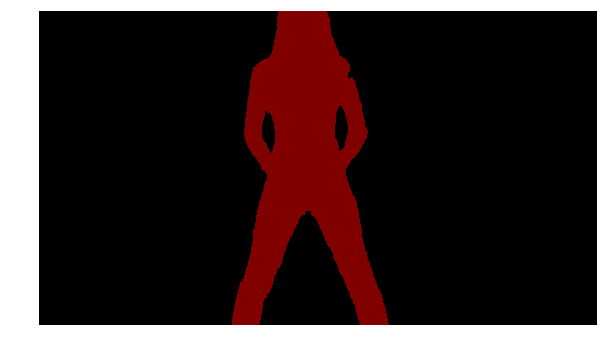

In [ ]:
body_seg_img = mpimg.imread('work/output_pose/body.png')
img_show_bgr(body_seg_img, convert=False)

### 4. 实现思路
- 要实现字“姐”跳动的效果我们首先要解析图像，将人像进行分割，将得到的人像作为词云的填充区域进行填充，然后将填充好的人像添加背景，最后完成我们想要的效果。
  1. 首先解析图片，将人像进行分割:

  <div style="text-align: center;">
    <img  src='https://ai-studio-static-online.cdn.bcebos.com/2f10ad57b4f44ff6ba79dd034bc6ada3c4815d319491447d8e07a5f30e7ed337'/>
  </div>

  2. 通过人像分割后得到的 Alpha通道，取值为0-255 (0为全透明，255为不透明)，也即取值越大的像素点越可能为人体，就可以得到人体的填充区域信息，使用词云将人体区域进行填充，便可以达到字符人体的效果。

  <div style="text-align: center;">
    <img  src='https://ai-studio-static-online.cdn.bcebos.com/ee7fe25cf16d423895053011ff2ab192ba678e7e448a4203b19bec9b78144f31'/>
  </div>



  3. 将得到字符人体，合并到背景图像中进行输出。
  <div style="text-align: center;">
    <img src='https://ai-studio-static-online.cdn.bcebos.com/552239d474064b3187557b824a70a52a74637afede3b46678d0f8816c1fb5b3a'/>
  </div>
  
- 了解完实现思路后，我们就可以开始动手实践了

#### 4.1 读取填充所需文本

In [ ]:
stop_words = set(['https', 'com'])

def get_text_content(text_file_path):
    '''
    获取填充文本内容
    '''
    text_content = ''
    with open(text_file_path, encoding='utf-8') as file:
        text_content = file.read()
    # 数据清洗，只保存字符串中的中文，字母，数字
    text_content_find = re.findall('[\u4e00-\u9fa5a-zA-Z0-9]+', text_content, re.S)  
    text_content = ' '.join(text_content_find)
    return text_content

In [ ]:
text_content = get_text_content('work/texts/text01.txt')

#### 4.2 生成背景

In [ ]:
def generate_background_img(width, height, font_path, text_content, stop_words, output_file_path):
    '''
    生成背景图像
    '''
    wordcloud = WordCloud(font_path=font_path,  colormap=colors.ListedColormap(['#f5f6f7']), repeat=True,  
                        max_words=20000,
                        prefer_horizontal=0.3,
                        stopwords=stop_words,
                        width=width, height=height, 
                        min_font_size=20,
                        background_color='#fefefe', margin=3).generate(text_content)

    wordcloud.to_file(output_file_path)

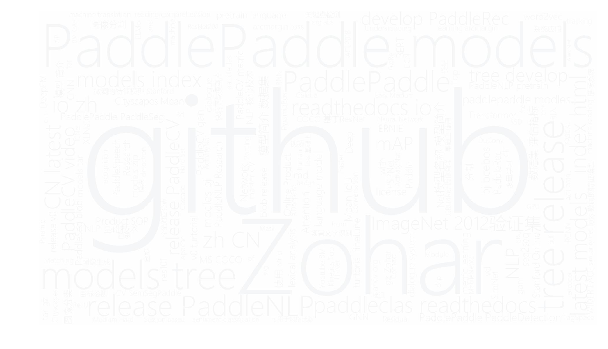

In [ ]:
background_img_path='work/img_bg.jpg'
font_path = 'work/texts/fonts/msyhl.ttc'

img_path = "work/imgs/body.jpg"
img = cv2.imread(img_path)
height, width, _ = img.shape

generate_background_img(width, height, font_path, text_content, stop_words, background_img_path)

img_show_bgr(cv2.imread(background_img_path))

In [ ]:
def img_analysis(img_path, background_img, font_path, colormap, text_content, stop_words):
    '''
    分析图片生成字符人像
    '''
    img_mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    height, width = img_mask.shape

    for row_index in range(height):
        for col_index in range(width):
            if img_mask[row_index][col_index] == 0:
                img_mask[row_index][col_index] = 255
            else:
                img_mask[row_index][col_index] = 0

    wc = WordCloud(font_path=font_path,
                    repeat=True,
                    background_color='white', 
                    min_font_size=1,
                    colormap=colormap,
                  margin=1, max_words=20000,
                  width=width, height=height, prefer_horizontal=0.5,
                  mask=img_mask,
                  stopwords=stop_words,
                  collocation_threshold=1).generate(text_content) # 最后生成数字

    wordcloud_result_array = wc.to_array()
    # 添加背景
    for row_index in range(height):
      for col_index in range(width):
        if wordcloud_result_array[row_index][col_index][0] == 255 and wordcloud_result_array[row_index][col_index][1] == 255 and wordcloud_result_array[row_index][col_index][2] == 255:
            wordcloud_result_array[row_index][col_index][0] = background_img[row_index][col_index][0]
            wordcloud_result_array[row_index][col_index][1] = background_img[row_index][col_index][1]
            wordcloud_result_array[row_index][col_index][2] = background_img[row_index][col_index][2]
    
    return wordcloud_result_array


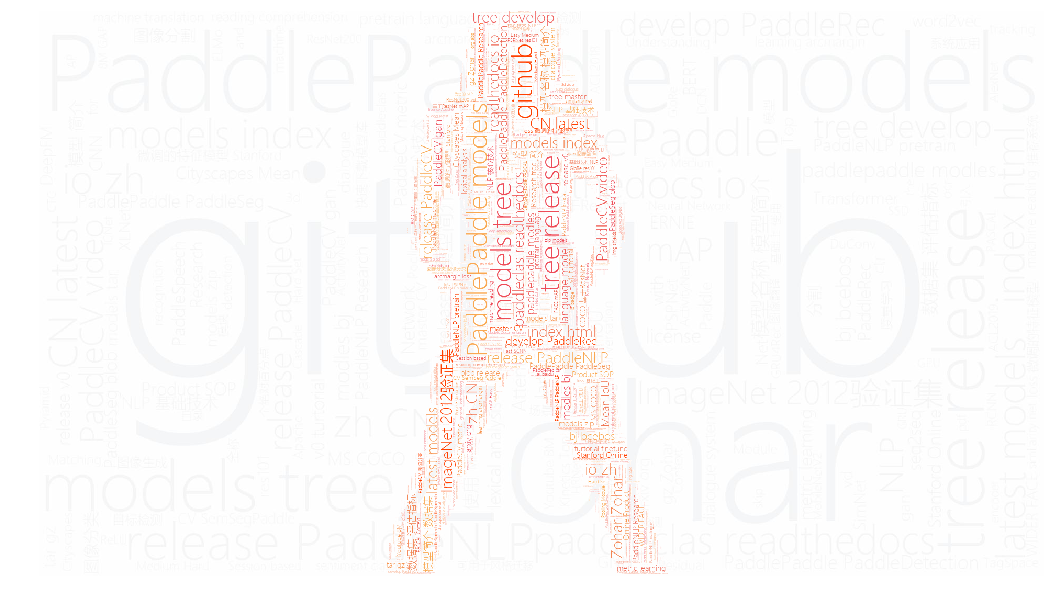

In [ ]:
colormap = colors.ListedColormap(['#ff4000', '#f9a852','#f69653','#f38654','#f07654','#ed6856','#ef5956','#ee4c58'])

background_img = cv2.imread(background_img_path)
background_img = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)

img_mask_path = "work/output_pose/body.png"

img_analysis_result = img_analysis(img_mask_path, background_img, font_path, colormap, text_content, stop_words)
img_analysis_result = cv2.cvtColor(img_analysis_result,cv2.COLOR_BGR2RGB)

img_show_bgr(img_analysis_result, size=18)

### 5. 让字"姐"动起来
- 具体实现步骤如下：

    1. 准备素材
    2. 将视频中每一帧保存成图片, 并生成mask结果
    3. 分析图片中的人体姿势， 并转换为字符，输出结果
    4. 合并图像到视频，得到最终的结果

#### 5.1 准备素材
- 含有人体动作视频，需要各位自行下载，本教程已经下载好(work/001.mp4)

- PS:视频素材可以到b站舞蹈区进行下载
    
    <img width=100, src='https://ai-studio-static-online.cdn.bcebos.com/0c394edb101c40c8b3cf8af2411a10e989f6c96c2fac4cf4a046ddbb4093c8ab'/>
     看完小姐姐跳舞，马上回来哦！
    

In [ ]:
# 素材图片位置
input_video = 'work/videos/001.mp4'

#### 5.2 将视频中每一帧保存成图片, 并生成mask结果

In [ ]:
def transform_video_to_image(video_file_path, img_path):
    '''
    将视频中每一帧保存成图片
    '''
    video_capture = cv2.VideoCapture(video_file_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    count = 0
    while(True):
        ret, frame = video_capture.read() 
        if ret:
            cv2.imwrite(img_path + '%d.jpg' % count, frame)
            count += 1
        else:
            break
    video_capture.release()
    
    filename_list = os.listdir(img_path)
    with open(os.path.join(img_path, 'img_list.txt'), 'w', encoding='utf-8') as file:
        file.writelines('\n'.join(filename_list))

    print('视频图片保存成功, 共有 %d 张' % count)
    return fps

In [ ]:
# 将视频中每一帧保存成图片
fps = transform_video_to_image(input_video, 'work/mp4_img/')

视频图片保存成功, 共有 2975 张


In [19]:
# 生成mask结果图片
!python /home/aistudio/PaddleSeg/pdseg/vis.py  \
                        --cfg /home/aistudio/work/humanseg.yaml \
                        --vis_dir /home/aistudio/work/mp4_img_mask \
                        --use_gpu

#### 5.3 分析图片中的人像， 并转换为字符人体，保存输出

In [20]:
def analysis_pose(input_frame_path, output_frame_path, background_img_path, font_path, colormap, text_content, stop_words, is_print=True, is_overwrite=True):
    '''
    分析图片中的人像， 并转换为字符人体，输出结果
    '''
    file_items = os.listdir(input_frame_path)
    file_len = len(file_items)

    background_img = cv2.imread(background_img_path)
    background_img = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)
    
    file_len = len(file_items)
    for i in range(0, file_len):
        file_item = '%d.png' % i
        input_file_path = os.path.join(input_frame_path, '%d.png' % i)
        output_file_path = os.path.join(output_frame_path, '%d.jpg' % i)
        
        if not is_overwrite and os.path.exists(output_file_path):
            continue

        if is_print:
            print(i,'/', file_len, ' doing', input_file_path)

        img_analysis_result = img_analysis(input_file_path, background_img, font_path, colormap, text_content, stop_words)
        img_analysis_result = cv2.cvtColor(img_analysis_result,cv2.COLOR_BGR2RGB)

        cv2.imwrite(output_file_path, img_analysis_result)

In [21]:
colormap = colors.ListedColormap(['#ff4000', '#f9a852','#f69653','#f38654','#f07654','#ed6856','#ef5956','#ee4c58'])
background_img_path = 'work/img_bg.jpg'

# 分析图片中的人体姿势， 并转换为皮影姿势，输出结果
analysis_pose('work/mp4_img_mask/', 'work/mp4_img_analysis/', background_img_path, font_path, colormap, text_content, stop_words, is_print=True, is_overwrite=False)

#### 5.4 合并图像到视频

In [22]:
def combine_image_to_video(comb_path, output_file_path, fps=30, is_print=False):
    '''
        合并图像到视频
    '''
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')    
    
    file_items = [item for item in os.listdir(comb_path) if item.endswith('.jpg')]
    file_len = len(file_items)
    # print(comb_path, file_items)
    if file_len > 0 :
        
        temp_img = cv2.imread(os.path.join(comb_path, file_items[0]))
        img_height, img_width, _ = temp_img.shape
        
        out = cv2.VideoWriter(output_file_path, fourcc, fps, (img_width, img_height))

        for i in range(file_len):
            pic_name = os.path.join(comb_path, str(i)+".jpg")
            if is_print:
                print(i+1,'/', file_len, ' ', pic_name)
            img = cv2.imread(pic_name)
            out.write(img)
        out.release()

In [23]:
# 合并图像到视频
combine_image_to_video('work/mp4_img_analysis/', 'work/mp4_analysis.mp4', fps)

In [24]:
# 添加音频 mp4_analysis_result.mp4为最终输出文件
! ffmpeg -i work/mp4_analysis.mp4 -i  work/videos/001.mp4 -c:v copy -c:a copy work/mp4_analysis_result.mp4 -y

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

- **OK, 最后我们得到跳动的字"姐"了!!!**

大家可以将视频下载到本地进行查看
<div style="text-align: center;">
  <img src='https://ai-studio-static-online.cdn.bcebos.com/006327c9444945f1be3ffa9cc26229f4cb6570522b894a8bbdfcafe8dd4cea20'/>
  
  <img src='https://ai-studio-static-online.cdn.bcebos.com/656be89ec5be42c8861df12a0ebb52d109ca6a40e27b40d980fa28987d1e9a24'/>
</div>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<img width=100, src='https://ai-studio-static-online.cdn.bcebos.com/0c394edb101c40c8b3cf8af2411a10e989f6c96c2fac4cf4a046ddbb4093c8ab'/> 从此，又多了一个看舞蹈区小姐姐的理由！哦耶！



## 四. 总结

- 本文在让读者欣赏舞蹈艺术同时，学习AI知识，体会到 PaddleSeg 的强大, 可谓一举两得！

- 来AI Studio互粉吧，来互关呀~，~等你哦~ https://aistudio.baidu.com/aistudio/personalcenter/thirdview/331031

- 如果你觉得这个项目还挺有意思，欢迎大家 ***Fork / ❤喜欢 / 评论*** 三连，你的**支持**是这个项目更新的最大动力！希望后续还能给大家输出更有意思的项目！